In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [33]:
titanic=pd.read_csv('D:\\PGP IN DATA SCIENCE with careerera\\Data Sets\\titanic(2).csv')
titanic

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


### Check how many non-null rows and what is the data type of that column

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


### Statistical measures

In [35]:
titanic.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


### Statistical measure for object column

In [36]:
titanic.describe(include='O')

,name,sex,ticket,cabin,embarked,boat,home.dest
count,850,850,850,191,849,308,464
unique,849,2,660,135,3,26,272
top,"Kelly, Mr. James",male,CA. 2343,G6,S,4,"New York, NY"
freq,2,551,10,4,589,25,36


### Total columns

In [37]:
titanic.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

### Check how many null or Nan rows present in each column

In [38]:
titanic.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

### Dealing with null values

### Fill the Nan values in fare column with the average fare

In [52]:
titanic.fare.mean()

34.012700942284994

In [54]:
titanic.fare.fillna(34, inplace=True)

### Fill the Nan values in age column with average age

In [55]:
titanic.age.mean()

29.519847189349115

In [56]:
titanic.age.fillna(30, inplace=True)

### Fill the Nan values in embarked column with most occuring value

In [58]:
titanic.embarked.value_counts()

S    589
C    176
Q     84
Name: embarked, dtype: int64

In [59]:
titanic.embarked.fillna('S', inplace=True)

In [63]:
titanic.isna().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
survived        0
dtype: int64

#### here we conclude that columns like cabin, boat, body and host.dest are contains 50%+ null values so we can drop these, because these columns not giving as any meaningful information. "ticket" column is not such important.

### Drop ticket, cabin, boat, body, home.dest columns

In [39]:
titanic.drop(['ticket','cabin','boat','body','home.dest'], axis=1 ,inplace=True)
titanic

,passenger_id,pclass,name,sex,age,sibsp,parch,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,13.0000,S,0
...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,50.0000,S,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,29.7000,C,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,26.0000,S,1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,13.7750,S,0


### We can create a column which gives us information about the travelling family members, here we add 'sibsp' and 'parch' columns together

In [40]:
titanic1=titanic.copy()

In [41]:
titanic1.insert(7, 'total', titanic1['sibsp']+titanic1['parch'])
titanic1

,passenger_id,pclass,name,sex,age,sibsp,parch,total,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,0,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,0,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,2,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,4,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,0,13.0000,S,0
...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,0,50.0000,S,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,0,29.7000,C,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,1,26.0000,S,1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,2,13.7750,S,0


### Reaname total column to along with passanger

In [42]:
titanic1.rename(columns={'total':'alomng_with_passanger'},inplace=True)
titanic1

,passenger_id,pclass,name,sex,age,sibsp,parch,alomng_with_passanger,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,0,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,0,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,2,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,4,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,0,13.0000,S,0
...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,0,50.0000,S,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,0,29.7000,C,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,1,26.0000,S,1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,2,13.7750,S,0


### Lets work on our original data

In [43]:
titanic

,passenger_id,pclass,name,sex,age,sibsp,parch,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,13.0000,S,0
...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,50.0000,S,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,29.7000,C,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,26.0000,S,1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,13.7750,S,0


### See our top 10 rows using iloc

In [44]:
titanic.iloc[0:10]

,passenger_id,pclass,name,sex,age,sibsp,parch,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,23.0000,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,13.0000,S,0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,22.5250,S,0
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,0.0000,S,0
7,560,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,13.0000,S,1
8,1079,3,"Ohman, Miss. Velin",female,22.0,0,0,7.7750,S,1
9,908,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,9.8250,S,0


In [45]:
titanic.iloc[0:10,[1,2]]

,pclass,name
0,3,"Smyth, Miss. Julia"
1,3,"Cacic, Mr. Luka"
2,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go..."
3,2,"Hocking, Mrs. Elizabeth (Eliza Needs)"
4,2,"Veal, Mr. James"
5,3,"Olsen, Mr. Henry Margido"
6,3,"Johnson, Mr. William Cahoone Jr"
7,2,"Sinkkonen, Miss. Anna"
8,3,"Ohman, Miss. Velin"
9,3,"Jussila, Miss. Mari Aina"


### How many male and female passangers on ship?

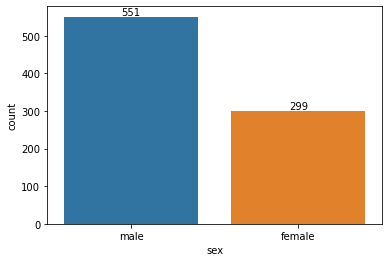

In [64]:
ax = sns.countplot(x='sex', data=titanic,
                   order=titanic['sex'].value_counts(ascending=False).index);

abs_values = titanic['sex'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

#### Conclusion: On ship there are 551 male and 299 female passangers

### How  many passangers are there in each oassanger class?

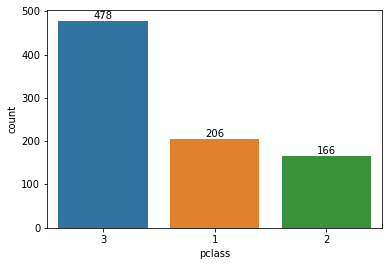

In [65]:
ax = sns.countplot(x='pclass', data=titanic,
                   order=titanic['pclass'].value_counts(ascending=False).index);

abs_values = titanic['pclass'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

#### Conclusion: Passangers class-3 has more people

### How many passangers are embarked from different embarked point?

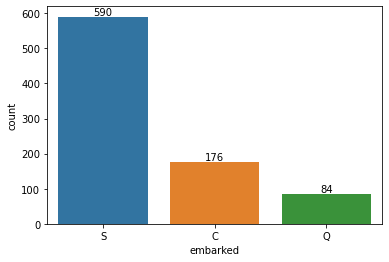

In [66]:
ax = sns.countplot(x='embarked', data=titanic,
                   order=titanic['embarked'].value_counts(ascending=False).index);

abs_values = titanic['embarked'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

### Top 10 highest fare ?

In [78]:
pd.pivot_table(titanic, index='name', values='fare', aggfunc=sum).sort_values(by='fare', ascending=False)[:10]

,fare
name,
"Lesurer, Mr. Gustave J",512.3292
"Cardeza, Mrs. James Warburton Martinez (Charlotte Wardle Drake)",512.3292
"Cardeza, Mr. Thomas Drake Martinez",512.3292
"Fortune, Mrs. Mark (Mary McDougald)",263.0000
"Fortune, Miss. Ethel Flora",263.0000
"Fortune, Mr. Mark",263.0000
"Ryerson, Miss. Emily Borie",262.3750
"Chaudanson, Miss. Victorine",262.3750
"Ryerson, Master. John Borie",262.3750


### Top 10 lowest fare?

In [80]:
pd.pivot_table(titanic, index='name', values='fare', aggfunc=sum).sort_values(by='fare', ascending=True)[:10]

,fare
name,
"Parr, Mr. William Henry Marsh",0.0
"Fry, Mr. Richard",0.0
"Leonard, Mr. Lionel",0.0
"Harrison, Mr. William",0.0
"Knight, Mr. Robert J",0.0
"Ismay, Mr. Joseph Bruce",0.0
"Reuchlin, Jonkheer. John George",0.0
"Frost, Mr. Anthony Wood ""Archie""",0.0
"Chisholm, Mr. Roderick Robert Crispin",0.0


### How many passaangers survived?

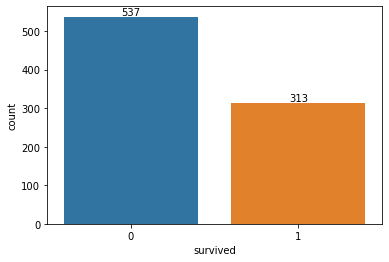

In [47]:
ax = sns.countplot(x='survived', data=titanic,
                   order=titanic['survived'].value_counts(ascending=False).index);

abs_values = titanic['survived'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

#### Conclusion: Out of 850, 537 passangers are died and 313 are survived.

### How many male and female passangers survived?

In [48]:
titanic.groupby('sex').survived.sum()

sex
female    210
male      103
Name: survived, dtype: int64

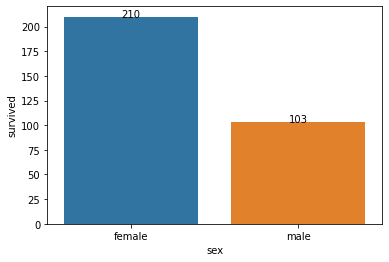

In [49]:
def value_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.annotate(y_list[i],(i,y_list[i]), ha='center')

sns.barplot(x='sex',y='survived', data=titanic, estimator=sum, ci=None)

index=titanic.groupby('sex').survived.sum().index
values=titanic.groupby('sex').survived.sum().values
value_label(index,values);

#### Conclusion: 210 female passangers and 103 male passangers are survived.

### How many passangers are survived wrt passangers class?

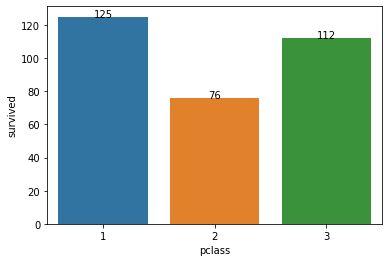

In [50]:
def value_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.annotate(y_list[i],(i,y_list[i]), ha='center')

sns.barplot(x='pclass', y='survived', data=titanic, estimator=sum, ci=None)

index=titanic.groupby('pclass').survived.sum().index
values=titanic.groupby('pclass').survived.sum().values
value_label(index,values);

#### Conclusion: Passangers who belongs to passangers class-1 are survived more